# Recolhimento das Letras
---



In [6]:
#%pip install vagalume
#import vagalume
from vagalume import lyrics
import pandas as pd
diretorio = "Musicas_SAdL2/"

In [7]:
#Listas com todas as músicas de Selvagens à Procura de Lei por álbum
#Álbuns: Aprendendo a Mentir, Selvagens a Procura de Lei, Praieiro

tracks_S = ['Dois de Fevereiro','Sangue Bom','Tarde Livre','Felina','O Que Será o Amanhã','Praieiro','Lua Branca','Guetos Urbanos','Bastidores','O Amor É um Rock 2','Projeto de Vida']
tracks_S2 = ['Massarrara','Juventude Solitude','Brasileiro','Música de Amor Número Um','Despedida','Sr. Coronel','Carrossel Em Câmera Lenta','Mar Fechado','Crescer Dói','Enquanto Eu Passar Na Sua Rua','Mucambo Cafundó','O Amor Existe, Mas Não Querem Que Você Acredite']
tracks_S3 = ['Amigos Libertinos','Adeus É Tudo Que Eu Preciso Ouvir de Você','Casona','Semana Passada','Jamoga','Surpresas','Sobre Meninos Elétricos e Mães Solteiras','Esperando Pelo 051','Doce/Amargo','Aprendendo a Mentir','Romance na Cidade Grande','Mais Um Palhaço No Seu Carnaval']

In [8]:
aprendendo = pd.DataFrame(tracks_S3)
aprendendo

praieiro = pd.DataFrame(tracks_S)
#praieiro

selvagens = pd.DataFrame(tracks_S2)
#selvagens

In [10]:
aprendendo.size

12

In [10]:
##Pegando as letras das músicas álbum a álbum e salvando no GDrive usando a API do Vagalume

artist = 'Selvagens à Procura de Lei'
  
for track in tracks_S:
  file = open(diretorio + track + ".txt", "w", encoding="utf-8")
  result = lyrics.find(artist,track)
  #print ('Achei: ', result.song.name)
  file.write(result.song.lyric)
  file.close()
   

for track in tracks_S2:
  file = open(diretorio + track + ".txt", "w", encoding="utf-8")
  result = lyrics.find(artist,track)
  #print ('Achei: ', result.song.name)
  file.write(result.song.lyric)
  file.close()
  

  
##Como um arquivo não pode ter o caractere '/' em seu título
##a música Doce/Amargo ganhou uma gambiarra ><

for track in tracks_S3:
  if track == 'Doce/Amargo':
    file = open(diretorio + 'Doce-Amargo' + ".txt", "w", encoding="utf-8")
    result = lyrics.find(artist,track)
    #print ('Achei: ', result.song.name)
    file.write(result.song.lyric)
    file.close()
  else:
    file = open(diretorio + track + ".txt", "w", encoding="utf-8")
    result = lyrics.find(artist,track)
    #print ('Achei: ', result.song.name)
    file.write(result.song.lyric)
    file.close()

# Criação da Matriz TF_IDF

---



In [4]:
#%pip install nltk
import os
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from math import log10
import csv
from operator import itemgetter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matheusmiguellima/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matheusmiguellima/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
def leDiretorio(diretorio):
    musicas = os.listdir(diretorio)
    m = []
    for musica in musicas:
        m.append(musica.replace(".txt",""))
    return m

def leMusica(diretorio,musica):
    VetorAux = []
    file = open(diretorio + musica + ".txt", encoding = "utf-8")
    linhas = file.readlines()
    for linha in linhas:
        linha = linha.lower()
        aux = word_tokenize(linha)
        VetorAux = VetorAux + aux
    return VetorAux

    
def SalvaDicMat(termos,musicas,dic,arq):
    data = open("CSVs/"+arq+".csv", "w", newline='')
    writer = csv.writer(data)
    conteudo = []
    conteudo = conteudo + [" "]
    for termo in termos:
        conteudo = conteudo + [termo]
    writer.writerows([conteudo])
    for musica in musicas:
        conteudo = []
        conteudo = conteudo + [musica]
        for termo in termos:
            conteudo = conteudo + [dic[termo,musica]]
        writer.writerows([conteudo])
        

def leMatDic(arq):
    with open("./CSVs/"+arq + '.csv') as csvfile:
        reader = csv.reader(csvfile)
        aux = 0
        dic = {}
        for row in reader:
            if (aux == 0):
                musicas = rows
                aux = aux + 1
                musicas.remove(" ")
            else:
                for i in range(1,len(row)):
                    dic[row[0],musicas[i - 1]] = row[i]
    return dic

def leVetDic(arq):
    with open("./CSVs/"+arq + '.csv') as csvfile:
        reader = csv.reader(csvfile)
        dic = {}
        for row in reader:
            dic[row[0]] = row[1]
    return dic

def EliminaPontuacao(palavras):
    VetorAux = []
    punctuations = list(string.punctuation)
    file = open("files/pontuacao.txt","r")
    pontuacao = file.read()
    pontuacao = pontuacao.split("\n")

    for p in palavras:
        if p not in punctuations and p not in pontuacao:
            VetorAux.append(p)
    return VetorAux

def EliminaStopWords(palavras):
    VetorAux = []
    stopWords = nltk.corpus.stopwords.words('portuguese')
    #stopWords = nltk.corpus.stopwords.words('english')
    file = open("files/stopwords.txt","r")
    stoplist = file.read()
    stoplist = stoplist.split("\n")
    for p in palavras: 
        aux = 0
        if p not in stopWords and p not in stoplist:
            VetorAux.append(p)
    return VetorAux

def Stemmer(palavras):
    ps = PorterStemmer()
    sb = SnowballStemmer("portuguese")
    aux = []
    for p in palavras:
        p = ps.stem(p)
        aux.append(sb.stem(p))
    return aux

def MatrizFrequencia(mt,termos):
    Mat = {}
    for i in mt:
        for j in termos:
            Mat[j,i] = mt[i].count(j) 
    return Mat

def FreqPonderada (MF):
    Mat = {}
    for i in MF: 
        if MF[i] > 0:
            Mat[i] = 1 + log10(MF[i])
        else:
            Mat[i] = 0
    return Mat


def df(mt,termos):
    Vet ={}
    for t in termos:
        aux = 0
        for i in mt:
            if(mt[i].count(t) > 0):
                aux = aux + 1
        Vet[t] = aux
    return Vet

def idf(DF,qtdM):
    Vet = {}
    for i in DF:
        Vet[i] = log10(qtdM/DF[i])
    return Vet

def tf_idf(TF,IDF):
    Mat = {}
    for i,j in TF:
        Mat[i,j] = TF[i,j] * IDF[i]
    return Mat

In [15]:
MF = {} 
TF ={} 
DF = {} 
IDF = {} 
TF_IDF = {} 
termos = [] 
mt = {} 
dirs = os.listdir()
if ("CSVs" not in dirs):
    os.mkdir("CSVs")
diretorio = "Musicas_SAdL/"
musicas = list(leDiretorio(diretorio))
for musica in musicas:
    palavras = leMusica(diretorio,musica)
    palavras = EliminaPontuacao(palavras)
    palavras = EliminaStopWords(palavras)
    palavras = Stemmer(palavras)
    termos = termos + palavras 
    mt[musica] = palavras 
termos = list(filter(None,termos))
termos = list(set(termos))
termos.sort()
MF = MatrizFrequencia(mt,termos)
TF = FreqPonderada(MF)
DF = df(mt,termos)
IDF = idf(DF,len(musicas))
TF_IDF = tf_idf(TF,IDF)
SalvaDicMat(termos,musicas,TF_IDF,"TF_IDF_Selvagens")

#Processamento da Matriz

---



In [2]:
import pandas as pd

/var/folders/v1/q4bz8xt12_vdk27lgp_w5bdw0000gn/T/ipykernel_93181/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
c = pd.read_csv("CSVs/TF_IDF_Selvagens.csv")
#c = c.drop(columns=['\'\'antigament'])
data = c.drop(columns=[' '])
data

,2000,abandon,abrac,abri,abrig,abriu,acen,achar,acho,aconselh,...,vã,véu,vênu,víci,zoológ,zé,águ,índi,últim,únic
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1.544068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.996481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.765917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,1.544068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,1.544068,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.361916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.544068,0.000000,0.000000,0.000000,...,0.000000,1.544068,0.000000,0.000000,0.000000,0.000000,1.544068,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
##Retirando as colunas em que o termo aparece em menos de cinco músicas

data2 = data
for i in data2.columns.values:
  
  coluna = data2.filter(items=[i])
  count = 0
  
  for j in coluna.values:
    if j == 0:
      count = count + 1
  if count > 30:
    data2 = data2.drop(columns=[i])
print(data2.shape)


(35, 76)


#Agrupamento de Dados

---



In [5]:
#%pip install scikit-learn
#%pip install matplotlib
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import mpl_toolkits.mplot3d.axes3d as p3

import numpy as np
from numpy import *

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

##DBSCAN

###Análise 1

In [6]:
result = DBSCAN(eps=10.5, min_samples=12).fit(data)
core_samples_mask = np.zeros_like(result.labels_, dtype=bool)
core_samples_mask[result.core_sample_indices_] = True
labels = result.labels_
ngrupos = len(set(result.labels_))
print(ngrupos)
labels

2


array([-1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,
       -1])

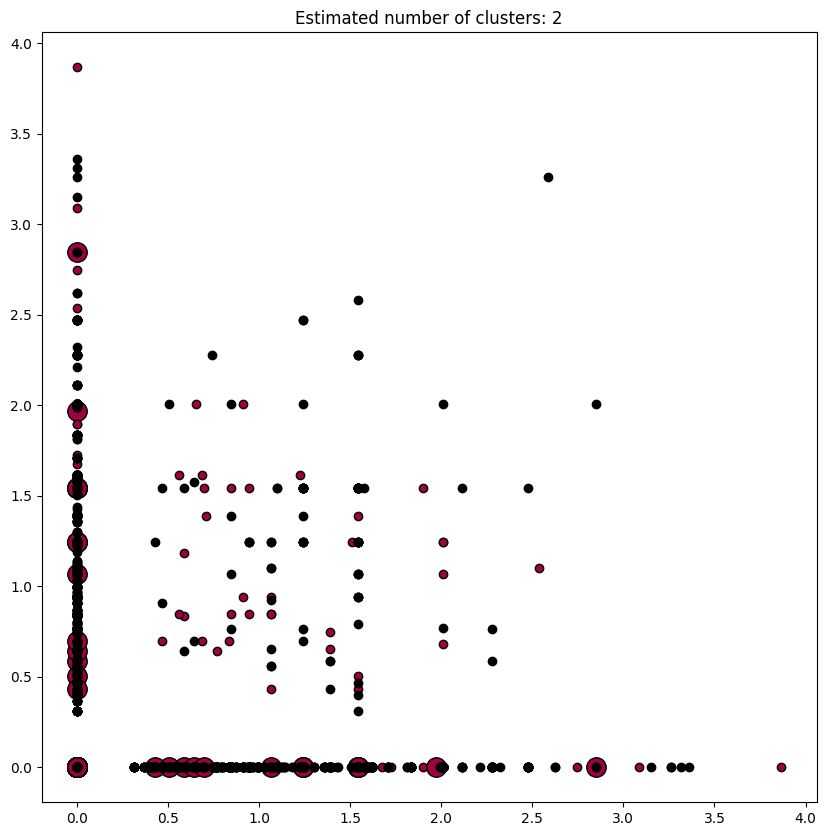

In [7]:
plt.figure(figsize=(10,10))
unique_labels = set(result.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (result.labels_ == k)
    h=0
    for x in range(0,945):
      xy = data.iloc[class_member_mask & core_samples_mask]
      plt.plot(xy.iloc[:, h], xy.iloc[:, h+1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = data.iloc[class_member_mask & ~core_samples_mask]
      plt.plot(xy.iloc[:, h], xy.iloc[:, h+1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)
      h=h+1

plt.title('Estimated number of clusters: %d' % ngrupos)
plt.show()

In [8]:
w = c.filter(items=[' '])
i = {'labels':labels}
ij = pd.DataFrame(i)
grupos = pd.concat([w,ij], axis=1)
grupos

,,labels
0,Sobre Meninos Elétricos e Mães Solteiras,-1
1,Sangue Bom,-1
2,Mais Um Palhaço No Seu Carnaval,0
3,Bastidores,0
4,Carrossel Em Câmera Lenta,0
5,Aprendendo a Mentir,0
6,Enquanto Eu Passar Na Sua Rua,-1
7,Doce-Amargo,0
8,Sr. Coronel,-1
9,Projeto de Vida,0


In [9]:
album = grupos.loc[grupos['labels']==0]
album = album.filter(items=[' '])
print(album.shape)
album


(24, 1)


,
2,Mais Um Palhaço No Seu Carnaval
3,Bastidores
4,Carrossel Em Câmera Lenta
5,Aprendendo a Mentir
7,Doce-Amargo
9,Projeto de Vida
10,Semana Passada
11,Lua Branca
12,Felina
13,Mar Fechado


In [10]:
album2 = grupos.loc[grupos['labels']==-1]
album2 = album2.filter(items=[' '])
print(album2.shape)
album2

(11, 1)


,
0,Sobre Meninos Elétricos e Mães Solteiras
1,Sangue Bom
6,Enquanto Eu Passar Na Sua Rua
8,Sr. Coronel
15,O Amor É um Rock 2
17,Casona
21,Brasileiro
27,Mucambo Cafundó
29,Romance na Cidade Grande
32,Massarrara


###Análise 2

In [11]:
result2 = DBSCAN(eps=3.4, min_samples=12).fit(data2)
core_samples_mask = np.zeros_like(result2.labels_, dtype=bool)
core_samples_mask[result2.core_sample_indices_] = True
labels2 = result2.labels_
ngrupos = len(set(result2.labels_))
print(ngrupos)
labels2

2


array([-1,  0,  0, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1,  0,  0, -1,  0,
        0])

IndexError: single positional indexer is out-of-bounds

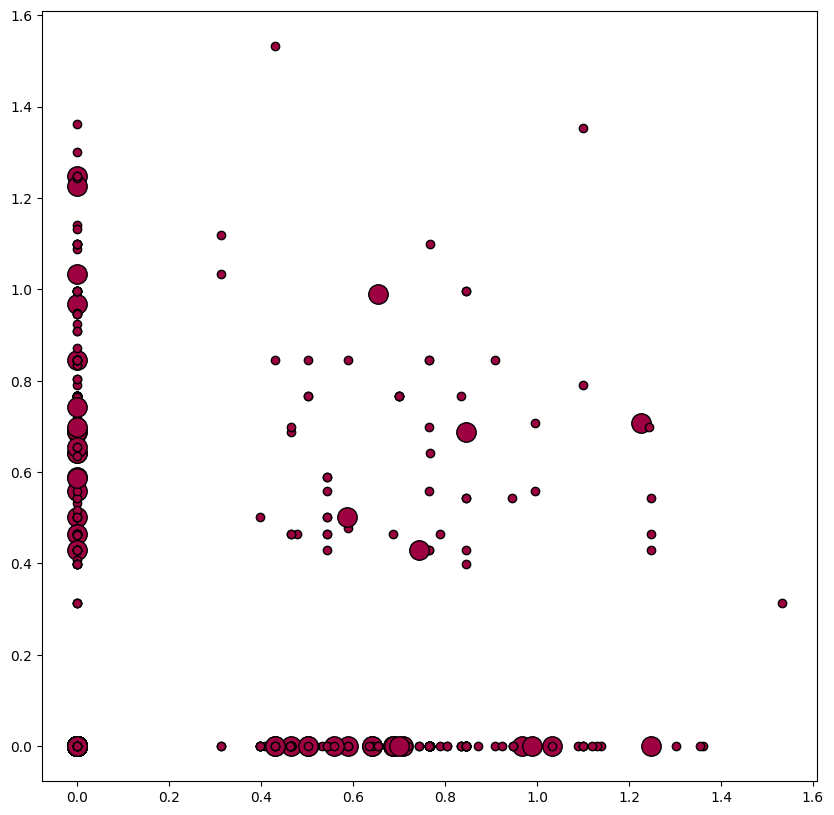

In [12]:
plt.figure(figsize=(10,10))
unique_labels = set(result2.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (result2.labels_ == k)
    h=0
    for x in range(0,76):
      xy = data2.iloc[class_member_mask & core_samples_mask]
      plt.plot(xy.iloc[:, h], xy.iloc[:,h+ 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = data2.iloc[class_member_mask & ~core_samples_mask]
      plt.plot(xy.iloc[:, h], xy.iloc[:, h+1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)
      h=h+1

plt.title('Estimated number of clusters: %d' % ngrupos)
plt.show()

###Avaliação

In [13]:
w = c.filter(items=[' '])

i = {'labels':labels}
ij = pd.DataFrame(i)
grupos = pd.concat([w,ij], axis=1)

j = {'labels':labels2}
ij2 = pd.DataFrame(j)
grupos2 = pd.concat([w,ij2], axis=1)


In [14]:
album = grupos.loc[grupos['labels']==0]
album = album.filter(items=[' '])
print(album.shape)
album

(24, 1)


,
2,Mais Um Palhaço No Seu Carnaval
3,Bastidores
4,Carrossel Em Câmera Lenta
5,Aprendendo a Mentir
7,Doce-Amargo
9,Projeto de Vida
10,Semana Passada
11,Lua Branca
12,Felina
13,Mar Fechado


In [15]:
album2 = grupos2.loc[grupos2['labels']==0]
album2 = album2.filter(items=[' '])
print(album2.shape)
album2

(20, 1)


,
1,Sangue Bom
2,Mais Um Palhaço No Seu Carnaval
4,Carrossel Em Câmera Lenta
8,Sr. Coronel
9,Projeto de Vida
11,Lua Branca
12,Felina
13,Mar Fechado
14,Dois de Fevereiro
15,O Amor É um Rock 2


In [16]:
album = grupos.loc[grupos['labels']==-1]
album = album.filter(items=[' '])
print(album.shape)
album



(11, 1)


,
0,Sobre Meninos Elétricos e Mães Solteiras
1,Sangue Bom
6,Enquanto Eu Passar Na Sua Rua
8,Sr. Coronel
15,O Amor É um Rock 2
17,Casona
21,Brasileiro
27,Mucambo Cafundó
29,Romance na Cidade Grande
32,Massarrara


In [17]:
album2 = grupos2.loc[grupos2['labels']==-1]
album2 = album2.filter(items=[' '])
print(album2.shape)
album2

(15, 1)


,
0,Sobre Meninos Elétricos e Mães Solteiras
3,Bastidores
5,Aprendendo a Mentir
6,Enquanto Eu Passar Na Sua Rua
7,Doce-Amargo
10,Semana Passada
16,Tarde Livre
17,Casona
21,Brasileiro
23,Despedida


##KMeans

###Análise 1

In [18]:
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(data)
y_means = kmeans.predict(data)
centers = kmeans.cluster_centers_
y_means

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

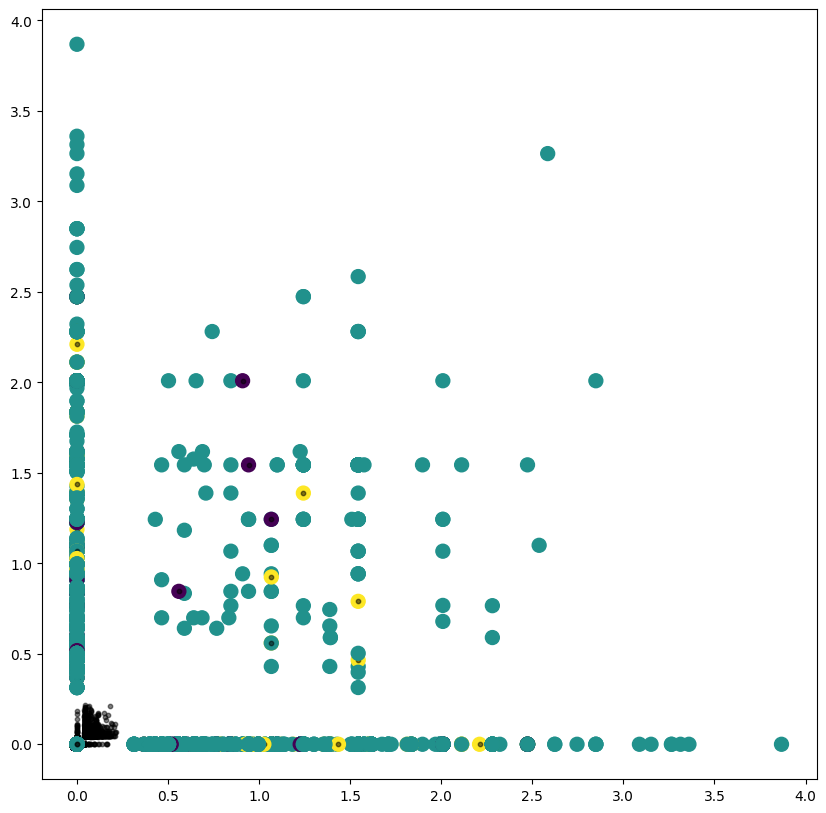

In [19]:
h = 0
plt.figure(figsize=(10,10))
for x in range(0,945):
  plt.scatter(data.iloc[:,h], data.iloc[:,h+1], c=y_means, s=100)
  plt.scatter(centers[:,h], centers[:,h+1], c='black',s=10, alpha=0.5);
  h=h+1
plt.show()

###Análise 2

In [20]:
kmeans2 = KMeans(n_clusters=3, random_state=10)
kmeans2.fit(data2)
y_kmeans = kmeans2.predict(data2)
centers2 = kmeans2.cluster_centers_
kmeans2.n_iter_
y_kmeans

array([2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

IndexError: single positional indexer is out-of-bounds

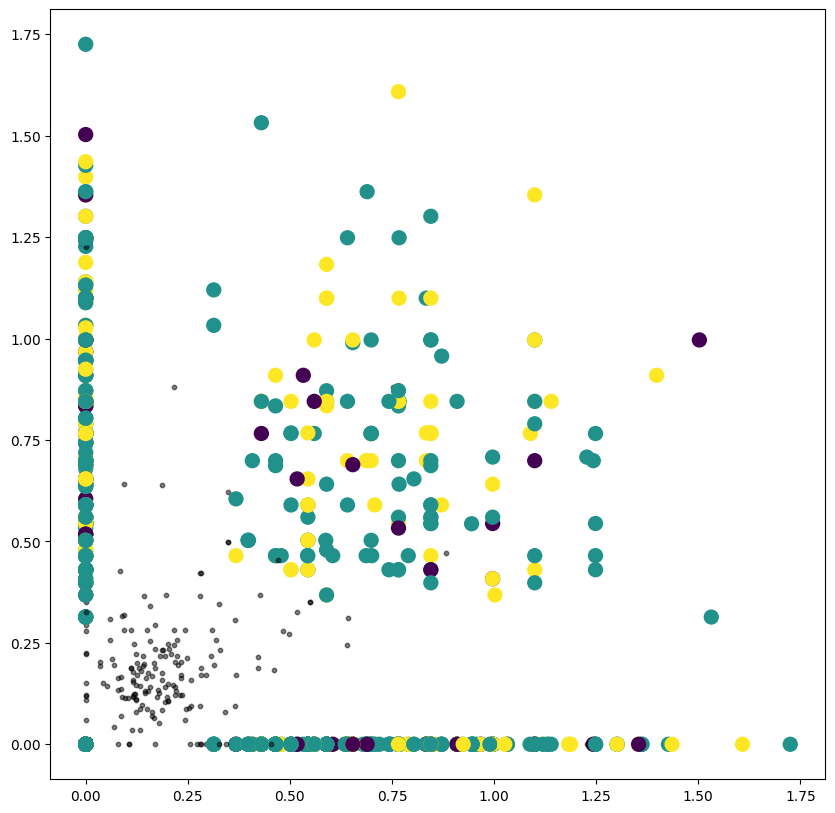

In [21]:
h = 0
plt.figure(figsize=(10,10))
for x in range(0,76):
  plt.scatter(data2.iloc[:,h], data2.iloc[:,h+1], c=y_kmeans, s=100)
  plt.scatter(centers2[:,h], centers2[:,h+1], c='black',s=10, alpha=0.5);
  h=h+1
plt.show()

###Avaliacao

In [22]:
w = c.filter(items=[' '])

i = {'labels':y_means}
ij = pd.DataFrame(i)
grupos = pd.concat([w,ij], axis=1)
grupos

,,labels
0,Sobre Meninos Elétricos e Mães Solteiras,1
1,Sangue Bom,1
2,Mais Um Palhaço No Seu Carnaval,1
3,Bastidores,1
4,Carrossel Em Câmera Lenta,1
5,Aprendendo a Mentir,1
6,Enquanto Eu Passar Na Sua Rua,2
7,Doce-Amargo,1
8,Sr. Coronel,1
9,Projeto de Vida,1


In [23]:
j = {'labels':y_kmeans}
ij = pd.DataFrame(j)
grupos2 = pd.concat([w,ij], axis=1)
grupos2

,,labels
0,Sobre Meninos Elétricos e Mães Solteiras,2
1,Sangue Bom,1
2,Mais Um Palhaço No Seu Carnaval,1
3,Bastidores,1
4,Carrossel Em Câmera Lenta,1
5,Aprendendo a Mentir,2
6,Enquanto Eu Passar Na Sua Rua,2
7,Doce-Amargo,1
8,Sr. Coronel,2
9,Projeto de Vida,1


In [24]:
print("Album 1:")
disk = grupos.loc[grupos['labels']==0]
disk=disk.filter(items=[' '])
print(disk)

disk2 = grupos2.loc[grupos2['labels']==0]
disk2= disk2.filter(items=[' '])
print(disk2)


Album 1:
                      
26  Juventude Solitude
                      
16         Tarde Livre
26  Juventude Solitude


In [25]:
print("Album 2:")
disk = grupos.loc[grupos['labels']==1]
disk = disk.filter(items=[' '])
print(disk)

disk2 = grupos2.loc[grupos2['labels']==1]
disk2 = disk2.filter(items=[' '])
print(disk2)

Album 2:
                                                   
0          Sobre Meninos Elétricos e Mães Solteiras
1                                        Sangue Bom
2                   Mais Um Palhaço No Seu Carnaval
3                                        Bastidores
4                         Carrossel Em Câmera Lenta
5                               Aprendendo a Mentir
7                                       Doce-Amargo
8                                       Sr. Coronel
9                                   Projeto de Vida
10                                   Semana Passada
11                                       Lua Branca
12                                           Felina
13                                      Mar Fechado
14                                Dois de Fevereiro
15                               O Amor É um Rock 2
16                                      Tarde Livre
17                                           Casona
18                                         Praieiro
19 

In [26]:
print("Album 3:")
disk = grupos.loc[grupos['labels']==2]
disk = disk.filter(items=[' '])
print(disk)

disk2 = grupos2.loc[grupos2['labels']==2]
disk2 = disk2.filter(items=[' '])
print(disk2)

Album 3:
                                
6  Enquanto Eu Passar Na Sua Rua
                                            
0   Sobre Meninos Elétricos e Mães Solteiras
5                        Aprendendo a Mentir
6              Enquanto Eu Passar Na Sua Rua
8                                Sr. Coronel
10                            Semana Passada
14                         Dois de Fevereiro
17                                    Casona
27                           Mucambo Cafundó
28                                    Jamoga


##Hierárquico Aglomerativo

###Análise 1


In [27]:
ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(data)
label = ward.labels_
ward.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
h=0
fig = plt.figure(figsize=(10,10))
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
  for x in range(0,300):
    ax.scatter(data.iloc[label == l, h], data.iloc[label == l, h+1], data.iloc[label == l, h+2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
    h=h+1
plt.show()

<Figure size 1000x1000 with 0 Axes>

###Análise 2

In [29]:
ward2 = AgglomerativeClustering(n_clusters=3,
                               linkage='ward').fit(data2)
label2 = ward2.labels_
ward2.labels_


array([1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [30]:
h=0
fig = plt.figure(figsize=(10,10))
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label2):
  for x in range(0,25):
    ax.scatter(data2.iloc[label2 == l, h], data2.iloc[label2 == l, h+1], data2.iloc[label2 == l, h+2],
               color=plt.cm.jet(float(l) / np.max(label2 + 1)),
               s=20, edgecolor='k')
    h=h+1
plt.show()

IndexError: single positional indexer is out-of-bounds

<Figure size 1000x1000 with 0 Axes>

###Avaliacao

In [31]:
w = c.filter(items=[' '])

i = {'labels':ward.labels_}
ij = pd.DataFrame(i)
grupo = pd.concat([w,ij], axis=1)
grupo


,,labels
0,Sobre Meninos Elétricos e Mães Solteiras,0
1,Sangue Bom,2
2,Mais Um Palhaço No Seu Carnaval,0
3,Bastidores,0
4,Carrossel Em Câmera Lenta,0
5,Aprendendo a Mentir,0
6,Enquanto Eu Passar Na Sua Rua,0
7,Doce-Amargo,0
8,Sr. Coronel,0
9,Projeto de Vida,0


In [32]:
j = {'labels':ward2.labels_}
ij = pd.DataFrame(j)
grupo2 = pd.concat([w,ij], axis=1)
grupo2

,,labels
0,Sobre Meninos Elétricos e Mães Solteiras,1
1,Sangue Bom,0
2,Mais Um Palhaço No Seu Carnaval,0
3,Bastidores,0
4,Carrossel Em Câmera Lenta,0
5,Aprendendo a Mentir,2
6,Enquanto Eu Passar Na Sua Rua,2
7,Doce-Amargo,1
8,Sr. Coronel,0
9,Projeto de Vida,0


In [33]:
print(ward.labels_)
print(ward2.labels_)

[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 2 2 1 0 0 1 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]


In [34]:
print("Album 1:")
disk = grupo.loc[grupo['labels']==0]
disk=disk.filter(items=[' '])
print(disk)

disk2 = grupo2.loc[grupo2['labels']==0]
disk2= disk2.filter(items=[' '])
print(disk2)


Album 1:
                                                   
0          Sobre Meninos Elétricos e Mães Solteiras
2                   Mais Um Palhaço No Seu Carnaval
3                                        Bastidores
4                         Carrossel Em Câmera Lenta
5                               Aprendendo a Mentir
6                     Enquanto Eu Passar Na Sua Rua
7                                       Doce-Amargo
8                                       Sr. Coronel
9                                   Projeto de Vida
10                                   Semana Passada
11                                       Lua Branca
12                                           Felina
13                                      Mar Fechado
14                                Dois de Fevereiro
15                               O Amor É um Rock 2
16                                      Tarde Livre
17                                           Casona
18                                         Praieiro
19 

In [35]:
print("Album 2:")
disk = grupo.loc[grupo['labels']==1]
disk=disk.filter(items=[' '])
print(disk)

disk2 = grupo2.loc[grupo2['labels']==1]
disk2= disk2.filter(items=[' '])
print(disk2)


Album 2:
              
21  Brasileiro
                                            
0   Sobre Meninos Elétricos e Mães Solteiras
7                                Doce-Amargo
10                            Semana Passada
17                                    Casona
27                           Mucambo Cafundó
28                                    Jamoga


In [36]:
print("Album 3:")
disk = grupo.loc[grupo['labels']==2]
disk=disk.filter(items=[' '])
print(disk)

disk2 = grupo2.loc[grupo2['labels']==2]
disk2= disk2.filter(items=[' '])
print(disk2)


Album 3:
             
1  Sangue Bom
                                 
5             Aprendendo a Mentir
6   Enquanto Eu Passar Na Sua Rua
14              Dois de Fevereiro
